In [2]:
# %matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import axes3d 

import sys
sys.path.insert(1,'/Users/jackh/Documents/FMBV_2023/Spectral FMBV/fmbv_src') # FMBV src

import StructuralFMBV

import scipy
import betterspy



In [3]:
n = 50

noise_mag = 20

pd_array = np.zeros((n,n))

def dcirc(xy, r, mag):
    x, y = xy[0], xy[1]

    temp = np.zeros((n,n))

    for i in range(n):
        for j in range(n):
            if (i-x)**2 + (j-y)**2 <= r**2: # inside the circle
                temp[i,j] = mag

    return temp

pd_array = pd_array + dcirc([20,20], 7, 255)
pd_array = pd_array + dcirc([50,40], 20, 200)
pd_array = pd_array + dcirc([10,40], 5, 220)
pd_array = pd_array + dcirc([0,0], 10, 150)
pd_array = pd_array + dcirc([40,10], 6, 100)

pd_array = pd_array + noise_mag*np.random.random((n,n))

    

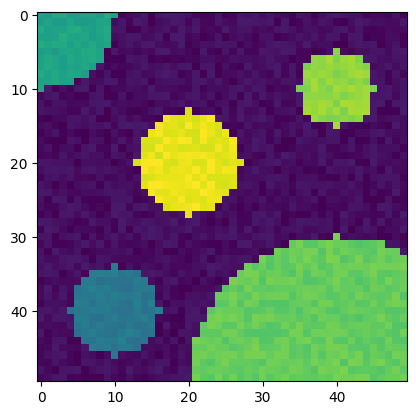

In [4]:
plt.imshow(pd_array, cmap='viridis')

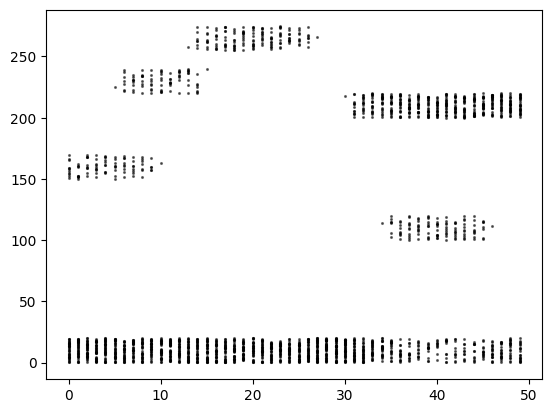

In [5]:
# trace
xv, yv = np.meshgrid(range(n), range(n))

# print(xv)

plt.figure()
plt.scatter(yv.flatten(), pd_array.flatten(), s = 1.5, alpha = 0.5, c='k')

In [6]:
to_load = pd_array[:,:,None]

sf = StructuralFMBV.StructuralFMBV(verbose=True)
sf.load_pd(to_load)

L, deg = sf._get_laplacian(sig=250, eps=10, ind_sig=5)

[verbose] Initialising FMBV object...
[verbose] Mode: 0
[verbose] Default memory handling.
[verbose] Loading Power Doppler...
[verbose] kd_tree...
[verbose] constructing laplacian...


In [7]:
P = scipy.sparse.diags(deg.diagonal()**-0.5)*L*scipy.sparse.diags(deg.diagonal()**-0.5)
vals, vecs = scipy.sparse.linalg.eigs(P,which='SR')


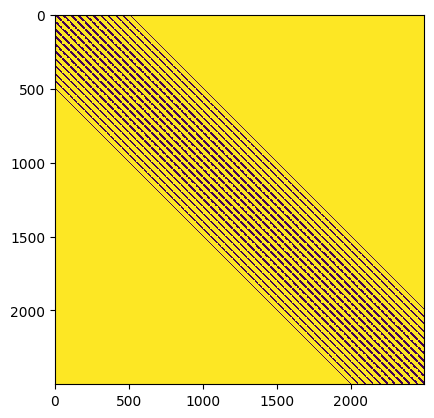

In [8]:
betterspy.show(L)

/Users/jackh/opt/anaconda3/envs/gordon_original/lib/python3.11/site-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
/Users/jackh/opt/anaconda3/envs/gordon_original/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


/Users/jackh/opt/anaconda3/envs/gordon_original/lib/python3.11/site-packages/matplotlib/collections.py:551: ComplexWarning: Casting complex values to real discards the imaginary part
  (np.asanyarray(self.convert_xunits(offsets[:, 0]), float),
/Users/jackh/opt/anaconda3/envs/gordon_original/lib/python3.11/site-packages/matplotlib/collections.py:552: ComplexWarning: Casting complex values to real discards the imaginary part
  np.asanyarray(self.convert_yunits(offsets[:, 1]), float)))
/Users/jackh/opt/anaconda3/envs/gordon_original/lib/python3.11/site-packages/matplotlib/colors.py:389: ComplexWarning: Casting complex values to real discards the imaginary part
  c = tuple(map(float, c))


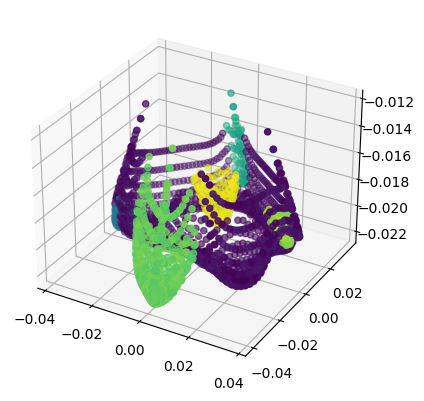

In [9]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(vecs[:,2],vecs[:,1],vecs[:,0],c=np.transpose(sf.pd_array).flatten(),cmap='viridis')

In [10]:
# SEBA clustering

S, R = sf.SEBA(np.real(vecs)) # bottleneck...

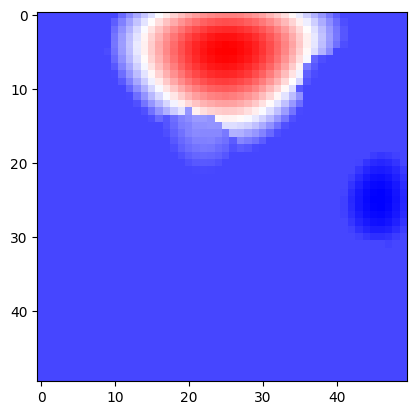

In [11]:
re2 = np.transpose(np.real(S[:,0].reshape(n,n)))

plt.imshow(re2, cmap='bwr')